## Technical Interview

Thank you for taking the time to complete this technical interview with Raise!

In this technical interview, you will be assessed on your competency in the following areas:

  •	Understanding entity relationships in a database,
  •	Merging data from different tables,
  •	Processing and manipulating data,
  •	Performing exploratory data analysis,
  •	Visualizing data,
  •	Predictive modeling,
  •	Communicating complex technical topics clearly and concisely.

You can complete these tasks using either R or Python. If you prefer R, please use the R Notebook file included in the .zip archive. Both files will require SQL coding to complete all of the tasks. Follow the example in Question 1 to see how to properly call SQL code.

We are more interested in understanding your logic, intuition, and explanations behind your work, rather than looking for perfect code, so don’t feel stressed about getting everything 100% accurate.

Feel free to use additional libraries you need to complete the assessment. This assessment should not take more than a few hours.

And remember, your goal is not to speed through the answers, but to come up with answers that demonstrate clear thought and communication.

Good luck!

## Getting Started

The data for this exercise is a small SQLite database containing roughly a dozen tables. If you are not familiar with the SQLite database, it uses a fairly complete and standard SQL syntax, though does not many advanced analytics functions. Consider it just a remote datastore for storing and retrieving data from. 

![](db-diagram.png)

## Use this data set to answer the questions below.

In [169]:
%load_ext sql 
#%sql sqlite:///db/sqlite/chinook.db
%sql sqlite:///chinook.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: @chinook.db'

In [170]:
import sqlite3
import pandas

#con = sqlite3.connect("db/sqlite/chinook.db")
con = sqlite3.connect("chinook.db")

### 1. How many different customers are there? (Example)

In [171]:
%%sql
select count(*) as count_customers, 
       count(distinct email) as count_uniq_emails
from customers

 * sqlite:///chinook.db
Done.


count_customers,count_uniq_emails
59,59


or alternatively...

In [207]:
query = """
select count(*) as count_customers, 
       count(distinct email) as count_uniq_emails
from customers
"""
pd.read_sql(query, con=con)

,count_customers,count_uniq_emails
0,59,59


### 2. How long is the longest track in minutes?

In [208]:
query = """
select max(milliseconds) as longest_track
from tracks
"""
pd.read_sql(query, con=con)   

,longest_track
0,5286953


### 3. Which genre has the shortest average track length?

In [209]:
query = """
select c.name, min(c.average_track)
from (select a.name, avg(a.milliseconds) as average_track
from tracks a,
     genres b
where a.genreid = b.genreid
group by a.name) c
"""
pd.read_sql(query,con=con)

,name,min(c.average_track)
0,É Uma Partida De Futebol,1071.0


### 4. Which artist shows up in the most playlists?

In [210]:
query = """
select b.artist, max(b.playlist) as playlist
from 
(select a.artist, count(a.play_list) as playlist
from 
(select art.name as artist, playlist.name as play_list
from artists art, 
     albums alb,
     tracks trac,
     playlist_track ptrack,
     playlists playlist
where art.artistid = alb.artistid
and alb.albumid = trac.albumid
and ptrack.trackid = trac.trackid
and playlist.playlistid = ptrack.playlistid) a
group by a.artist
order by playlist desc) b
"""
pd.read_sql(query, con=con)

,artist,playlist
0,Iron Maiden,516


### 5. What was the most popular album among these customers?

In [211]:
query = """
select a.album_title, max(a.album_unitprice) as most_purchase_by_unitprice
from (select albums.Title as album_title, count(tracks.unitprice) as album_unitprice
from customers cus,
     invoices inv,
     invoice_items invitems,
     tracks,
     albums
where cus.customerid = inv.customerid
and inv.invoiceid = invitems.invoiceid
and invitems.trackid = tracks.TrackId
and tracks.AlbumId = albums.AlbumId
group by albums.Title
order by 2 desc) a
"""
pd.read_sql(query, con=con)

,album_title,most_purchase_by_unitprice
0,Minha Historia,27


### 6. What is the correlation between the length of a track and its price?

In [177]:
track_facts = pandas.read_csv("track_facts.csv")

In [178]:
track_facts.head()

,genre,minutes,price
0,Rock,5.7,0.99
1,Rock,5.7,0.99
2,Rock,3.8,0.99
3,Rock,4.2,0.99
4,Rock,6.2,0.99


In [179]:
track_facts.isnull().any()

genre      False
minutes    False
price      False
dtype: bool

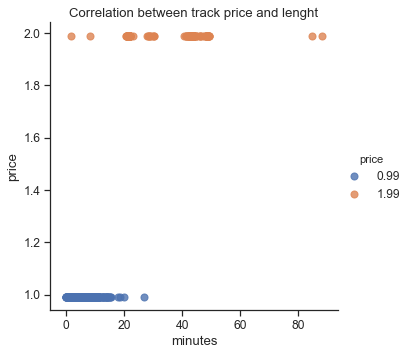

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('minutes', # Horizontal axis
           'price', # Vertical axis
           data=track_facts, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="price", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 50}) # S marker size

# Set title
plt.title('Correlation between track price and lenght')
plt.show()

### 7. Do any seasonal patterns occur in purchases (invoices)?

In [181]:
import pandas as pd

In [182]:
orders = pandas.read_csv("orders.csv")

In [183]:
orders.head()

,invoice_date,genre,sales,tracks_sold
0,2009-01-01,Rock,1.98,2
1,2009-01-02,Rock,3.96,4
2,2009-01-03,Rock,5.94,6
3,2009-01-06,Jazz,1.98,2
4,2009-01-06,Metal,1.98,2


In [184]:
orders.isnull().any()

invoice_date    False
genre           False
sales           False
tracks_sold     False
dtype: bool

In [185]:
orders["invoice_month"] = pd.DatetimeIndex(orders["invoice_date"]).month
orders.head()

,invoice_date,genre,sales,tracks_sold,invoice_month
0,2009-01-01,Rock,1.98,2,1
1,2009-01-02,Rock,3.96,4,1
2,2009-01-03,Rock,5.94,6,1
3,2009-01-06,Jazz,1.98,2,1
4,2009-01-06,Metal,1.98,2,1


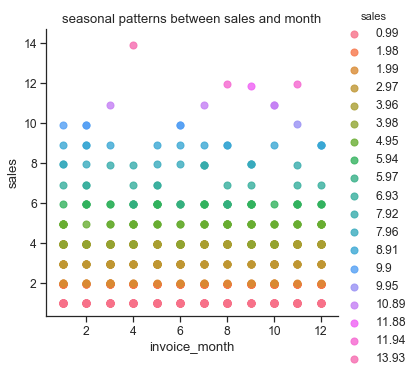

In [186]:
# Set style of scatterplot
sns.set()
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('invoice_month', # Horizontal axis
           'sales', # Vertical axis
           data=orders, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="sales", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 50}) # S marker size

# Set title
plt.title('seasonal patterns between sales and month')
plt.show()

In [ ]:
#The sales pattern is consistent until we reach sales of about $7 or greater. 
#When sales is $7 we don't make sales during the months of march, June, July and October
#When sales are $9 we don't make sales during april, september, and november
#when sales are $10 we only make sales from Januray, Feburary and June


### 8. How would you tell whether a new Rock song is an outlier in terms of track length?
*use track_facts*

In [187]:
track_facts.head()

,genre,minutes,price
0,Rock,5.7,0.99
1,Rock,5.7,0.99
2,Rock,3.8,0.99
3,Rock,4.2,0.99
4,Rock,6.2,0.99


In [188]:
track_facts.isnull().any()

genre      False
minutes    False
price      False
dtype: bool

In [189]:
df_filtered_genre = track_facts[track_facts['genre'] == 'Rock']
df_filtered_genre.head()

,genre,minutes,price
0,Rock,5.7,0.99
1,Rock,5.7,0.99
2,Rock,3.8,0.99
3,Rock,4.2,0.99
4,Rock,6.2,0.99


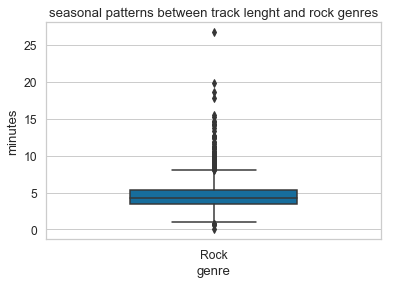

In [190]:
sns.set_style("whitegrid")
bplot = sns.boxplot(y='minutes', x='genre', 
                 #data=df_filtered_genre,
                 data= track_facts.query("genre=='Rock'"),
                 width=0.5,
                 palette="colorblind")
plt.title('seasonal patterns between track lenght and rock genres')
plt.show()

### 9. Prepare a plot(s) that effectively illustrates the variation of track length by genre.
*use track_facts*

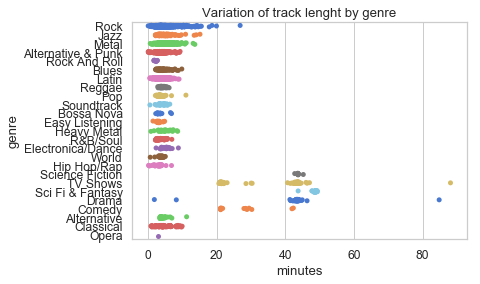

In [191]:
# Load data
#df_track_facts = sns.load_dataset("track_facts")

# Set up a stripplot
g = sns.stripplot("minutes", "genre", data=track_facts, palette="muted")
plt.title("Variation of track lenght by genre")                   

# Show plot
plt.show()


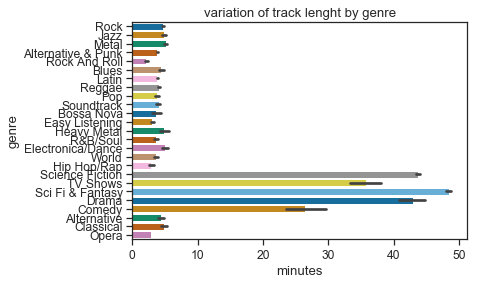

In [337]:
# Set style of scatterplot
sns.set()
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.barplot('minutes', # Horizontal axis
           'genre', # Vertical axis
           data=track_facts, # Data source
            palette="colorblind") # S marker size

# Set title
plt.title('variation of track lenght by genre')
plt.show()


### 10. Prepare a plot(s) that summarizes sales by month.
*use orders*

In [193]:
orders.head()

,invoice_date,genre,sales,tracks_sold,invoice_month
0,2009-01-01,Rock,1.98,2,1
1,2009-01-02,Rock,3.96,4,1
2,2009-01-03,Rock,5.94,6,1
3,2009-01-06,Jazz,1.98,2,1
4,2009-01-06,Metal,1.98,2,1


In [202]:
df_sum_sales = orders.groupby("invoice_month")
df_sum_sales.head()

,invoice_date,genre,sales,tracks_sold,invoice_month
0,2009-01-01,Rock,1.98,2,1
1,2009-01-02,Rock,3.96,4,1
2,2009-01-03,Rock,5.94,6,1
3,2009-01-06,Jazz,1.98,2,1
4,2009-01-06,Metal,1.98,2,1
13,2009-02-01,Latin,3.96,4,2
14,2009-02-02,Latin,3.96,4,2
15,2009-02-03,Latin,5.94,6,2
16,2009-02-06,Latin,3.96,4,2
17,2009-02-06,Reggae,4.95,5,2


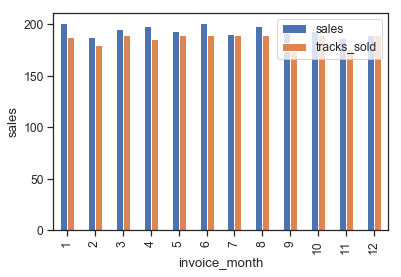

In [198]:
df_sum_sales = orders.groupby("invoice_month").sum().plot(kind='bar',legend=True)
df_sum_sales.set_xlabel("invoice_month")
df_sum_sales.set_ylabel("sales")
#df_sum_sales.legend=True
plt.show()

### 11. Are there improvements and/or changes you would make to your plots above if your audience was a group of data engineers and data scientists? What about if your audience was from product/marketing and sales?

In [ ]:
#to a team of product/marketing and sales members I would should the plot above as 
#it displays the months in which sales are lower. The team could use this information 
#to create more campaigns to increase sales

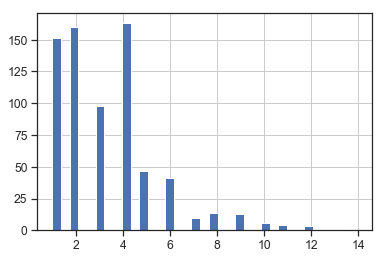

In [331]:
#to a team of data scientist and engineers I would show the frequency of sales by month
orders["sales"].hist(bins=35)
plt.show()

### 12. We want to build a recommendation service for our customers. 

* What features might be important for predicting whether a customer is likely to purchase a track? 
* Create a simple model based on those features and evaluate it's performance. 
* How much did those features individually contribute to the predictions of your model?
* How would you explain your model to a Product Manager? To the Sales team?
* What next steps would you take to improve the predictive performance of your model?

In [286]:
query = """
select cus.CustomerId, inv.InvoiceId, inv.InvoiceDate, inv.Total as invoice_total,
       invitems.Quantity,invitems.UnitPrice,tracks.Milliseconds,
       tracks.MediaTypeId, tracks.Name as Track_name, albums.Title as Album_title
from customers cus,
     invoices inv,
     invoice_items invitems,
     tracks,
     albums
where cus.customerid = inv.customerid
and inv.invoiceid = invitems.invoiceid
and invitems.trackid = tracks.TrackId
and  tracks.AlbumId = albums.AlbumId
"""
df_track_purchase= pd.read_sql(query, con=con)
df_track_purchase

,CustomerId,InvoiceId,InvoiceDate,invoice_total,Quantity,UnitPrice,Milliseconds,MediaTypeId,Track_name,Album_title
0,1,98,2010-03-11 00:00:00,3.98,1,1.99,2923548,3,Experiment In Terra,"Battlestar Galactica (Classic), Season 1"
1,1,98,2010-03-11 00:00:00,3.98,1,1.99,2927677,3,Take the Celestra,"Battlestar Galactica (Classic), Season 1"
2,1,121,2010-06-13 00:00:00,3.96,1,0.99,219742,1,Shout It Out Loud,Greatest Kiss
3,1,121,2010-06-13 00:00:00,3.96,1,0.99,225332,1,Calling Dr. Love,Greatest Kiss
4,1,121,2010-06-13 00:00:00,3.96,1,0.99,192496,1,Strutter,Greatest Kiss
5,1,121,2010-06-13 00:00:00,3.96,1,0.99,262243,1,Cold Gin,Greatest Kiss
6,1,143,2010-09-15 00:00:00,5.94,1,0.99,231640,2,Think About You,Appetite for Destruction
7,1,143,2010-09-15 00:00:00,5.94,1,0.99,375349,2,Rocket Queen,Appetite for Destruction
8,1,143,2010-09-15 00:00:00,5.94,1,0.99,284744,2,Don't Cry (Original),Use Your Illusion I
9,1,143,2010-09-15 00:00:00,5.94,1,0.99,303436,2,Back off Bitch,Use Your Illusion I


In [287]:
df_track_purchase["invoice_month"] = pd.DatetimeIndex(df_track_purchase["InvoiceDate"]).month
df_track_purchase.head()

,CustomerId,InvoiceId,InvoiceDate,invoice_total,Quantity,UnitPrice,Milliseconds,MediaTypeId,Track_name,Album_title,invoice_month
0,1,98,2010-03-11 00:00:00,3.98,1,1.99,2923548,3,Experiment In Terra,"Battlestar Galactica (Classic), Season 1",3
1,1,98,2010-03-11 00:00:00,3.98,1,1.99,2927677,3,Take the Celestra,"Battlestar Galactica (Classic), Season 1",3
2,1,121,2010-06-13 00:00:00,3.96,1,0.99,219742,1,Shout It Out Loud,Greatest Kiss,6
3,1,121,2010-06-13 00:00:00,3.96,1,0.99,225332,1,Calling Dr. Love,Greatest Kiss,6
4,1,121,2010-06-13 00:00:00,3.96,1,0.99,192496,1,Strutter,Greatest Kiss,6


In [288]:
#check for null values
df_track_purchase.isnull().any()

CustomerId       False
InvoiceId        False
InvoiceDate      False
invoice_total    False
Quantity         False
UnitPrice        False
Milliseconds     False
MediaTypeId      False
Track_name       False
Album_title      False
invoice_month    False
dtype: bool

In [289]:
df_test_data = df_track_purchase["invoice_total"] <= 0
df_test_data.head()

0    False
1    False
2    False
3    False
4    False
Name: invoice_total, dtype: bool

1    1976
2     146
3     111
4       4
5       3
Name: MediaTypeId, dtype: int64


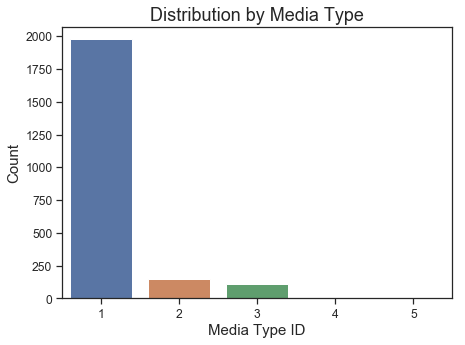

In [290]:
#look at the distribution based on media files. We will use MediaTypeID as one of our X values
print(df_track_purchase["MediaTypeId"].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_track_purchase['MediaTypeId'])
plt.title("Distribution by Media Type", fontsize=18)
plt.xlabel("Media Type ID", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [291]:
#Check for outliers in the columns we want to use for our X values

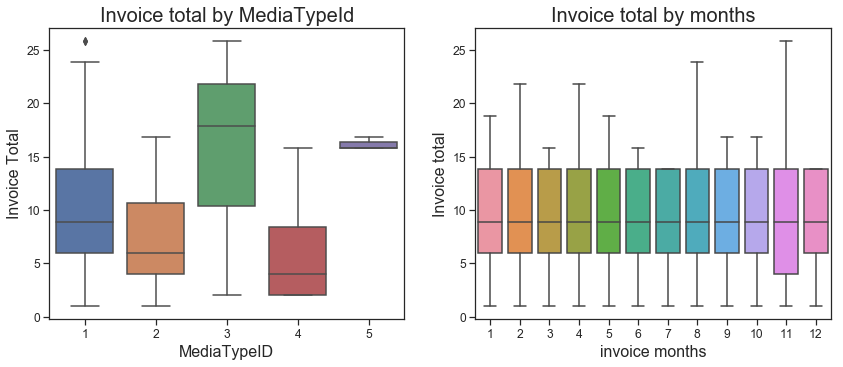

In [292]:
plt.figure(figsize=(14,6))
#I will explore the Invoice total by different features of X and see the distribuition of 
#Invoice total by transactions
plt.subplot(121)
ax = sns.boxplot(x ="MediaTypeId",y="invoice_total",
                 data=df_track_purchase)
ax.set_title("Invoice total by MediaTypeId", fontsize=20)
ax.set_xlabel("MediaTypeID", fontsize=16)
ax.set_ylabel("Invoice Total", fontsize = 16)

plt.subplot(122)
ax1 = sns.boxplot(x ="invoice_month",y="invoice_total", data=df_track_purchase)
ax1.set_title("Invoice total by months", fontsize=20)
ax1.set_xlabel("invoice months", fontsize=16)
ax1.set_ylabel("Invoice total", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

In [293]:
#find the rows with outlier information. We will run a base line model first and if accuracy
#is low then we will remove the outliers to see if we can improve accuracy. 
crit_a1 = df_track_purchase.invoice_total > 25
crit_a2 = df_track_purchase['MediaTypeId'] == 1
final_crit_a = crit_a1 & crit_a2 

df_track_purchase[final_crit_a]


,CustomerId,InvoiceId,InvoiceDate,invoice_total,Quantity,UnitPrice,Milliseconds,MediaTypeId,Track_name,Album_title,invoice_month
1618,6,404,2013-11-13 00:00:00,25.86,1,0.99,207830,1,Insensível,Volume Dois,11
1631,6,404,2013-11-13 00:00:00,25.86,1,0.99,349492,1,So Cruel,Achtung Baby,11


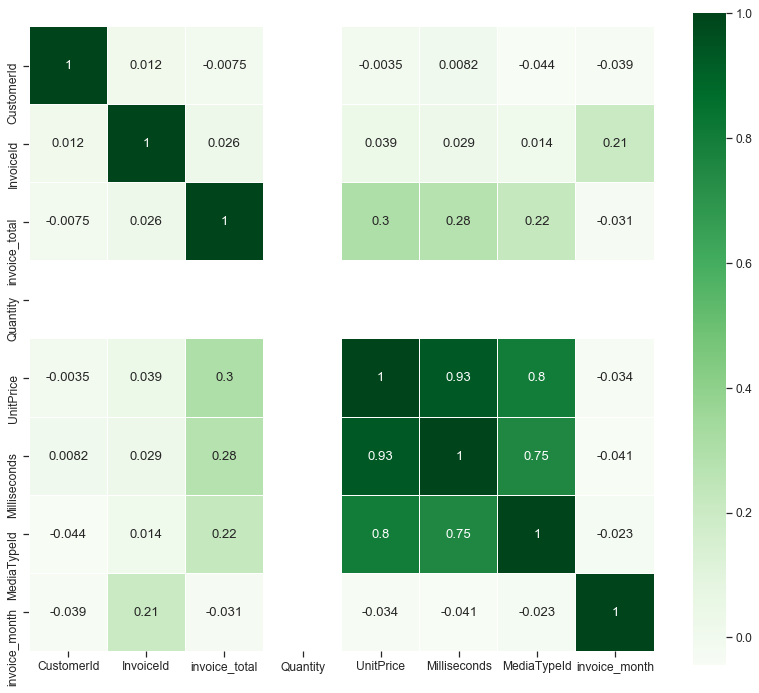

In [294]:
#create a heatmap with a background color of greeen to see feature correlation

colormap = plt.cm.Greens
plt.figure(figsize=(14,12))

sns.heatmap(df_track_purchase.corr(), linewidths=0.1, vmax=1.0,square=True,cmap=colormap,linecolor='White',
           annot=True)
plt.show()

In [ ]:
#Let's use feature selection to determine which features we should include in the model. 

In [311]:
from sklearn.feature_selection import RFE
X = df_track_purchase[['CustomerId','InvoiceId','Quantity','UnitPrice','Milliseconds',
                        'invoice_total','invoice_month']]
Y = df_track_purchase[['MediaTypeId']].values.ravel()
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 5
Selected Features: [ True False  True  True False  True  True]
Feature Ranking: [1 2 1 1 3 1 1]


In [ ]:
#Let's see the score of the features to see which one has the higher importance

In [328]:
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df_track_purchase[['CustomerId','InvoiceId','Quantity','UnitPrice','Milliseconds',
                        'invoice_total','invoice_month']]
Y = df_track_purchase[['MediaTypeId']].values.ravel()
# feature extraction
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)


[1.515e+02 4.363e+02 0.000e+00 1.015e+02 1.338e+09 5.986e+02 9.332e+00]


In [312]:
#create X and Y variables
X = df_track_purchase[['CustomerId','InvoiceId','Quantity','UnitPrice','Milliseconds',
                        'invoice_total','invoice_month']]
Y = df_track_purchase[['MediaTypeId']].values.ravel()

In [313]:
#lets create a traning and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [314]:
#find predictions using logistic regression model
#remove the warnings related to default parameters
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


param_grid = {'C': [6,7,8,9,10,11,12],
             'penalty': ['l1','l2']
             }

lr = LogisticRegression(n_jobs=1)
grid_clf_lr = GridSearchCV(lr, param_grid, cv=3)

train = grid_clf_lr.fit(X_train, y_train)
y_pred = grid_clf_lr.predict(X_test)

#Print best parameter and training score
print('Best parameter choice for logistic model: {params}'.format(
      params=grid_clf_lr.best_params_, score=grid_clf_lr.best_score_))
print('Training score for the best parameter: {score}'.format(
      params=grid_clf_lr.best_params_, score=grid_clf_lr.best_score_))

print('\n Logistic cufusion matrix \n',confusion_matrix(y_test,y_pred))  
print('\n Logistic classification report \n',classification_report(y_test,y_pred))  
print('Logistic accuracy score:',accuracy_score(y_test, y_pred))  

/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning:

The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.



Best parameter choice for logistic model: {'C': 6, 'penalty': 'l1'}
Training score for the best parameter: 0.9285714285714286

 Logistic cufusion matrix 
 [[391   0   1   0   0]
 [ 23   0   0   0   0]
 [  0   0  30   0   0]
 [  1   0   0   0   0]
 [  2   0   0   0   0]]

 Logistic classification report 
               precision    recall  f1-score   support

           1       0.94      1.00      0.97       392
           2       0.00      0.00      0.00        23
           3       0.97      1.00      0.98        30
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2

   micro avg       0.94      0.94      0.94       448
   macro avg       0.38      0.40      0.39       448
weighted avg       0.89      0.94      0.91       448

Logistic accuracy score: 0.9397321428571429


/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [ ]:
#If I were explaining the process to a product manager I would say the following
#The model indicates that based on the media type there is a 93% likely hood that customers
#will purchase a track. However, as a product manager you are looking for value proposition. 
#You want to understand based on the results what impact does this have on the product 
#features. Are their features that need to be added to model or removed from the model that
#will drive more value add? Based on the media types sales are driven primarily from MPEG audio file
#which is a MP3 file format and can be played via any mp3 player. The second format is Protected AAC audio file which means the file 
#was purchased from iTunes and can only be used with iTunes. The third format is Protected MPEG-4 video file means the file 
#is a video format purchased form iTunes and can only be used from iTunes. These formats would
#explain why we have small training examples for format 2 and 3. Based on this information 
#the product manager may need to determine if they want to include more streaming formats 
#that are not tied to a specific vendor or do they want to drive more sales from audio formats specific to iTunes?

#To the sales team I would indicate the following:
#The model indicates that based on the media type there is a 93% likely hood that customers
#will purchase mp3 audio tracks that can be played using a standard mp3 player. Based on the
#model our sales are primarlity coming from MP3 streaming not tied to specific vendors like apple. 


In [ ]:
#To improve the model I would remove the outliers and create additonal features to
#see if i can improve accuracy. I would also need a way to deal with the imbalance of 
#the data. The accuracy is definitly being impacted by low amount of training data for certain media types.

### 13.	The business is also interested in building a dynamic pricing engine at the individual track level. List the steps you would take to build a dynamic pricing engine from start to finish. Please be detailed in your steps:  include the modeling technique, data subsets, and performance criteria you would explore, plus additional information that you feel might be crucial for your audience’s understanding. (FYI, your audience is composed of data scientists.)

In [ ]:
#Pricing overview
#Understand the business goals and align our strategy with our goals. For example, are we
# a low cost provider and therefore, we should ensure our pricing rules have minimum boundries defined.

#Define the pricing factors that we should consider. For example, changes in demand and 
#competitive pricing

#Test different pricing strategies using A/B testing

#Steps necessary to follow:
#Get a Data set to work with
#Data set: I would include the following data set
#scrap and clean data from 2-3 competitors and market rate. This will give us an idea of what the pricing is from our 
#competitors for similar products that we have. We get an idea of what customers are paying for.
#in relation to what the market can bear at a given time for the product.

#Cleaning data:
#requires checking and addressing NAN values, invalid data and outliers

#Explore the data
#Once the data is cleaned, we need to review the data and determine if there are answers
#related to patterns, trends or other aspects that influence pricing. For example, is pricing
#seasonal? What are the market conditions that impact pricing? What products are sold in 
#higher frequency? 

#prepare features for model
#Once we have answers to some of our baseline questions we need prepare our features 
#we need to explore it and determine the type of relationships
#the features have with each other. For example, are the X features linear to Y variable
#are the X features correlated with each other. If the features are not linear or X features
#are have high correlation with each other then perform feature engineering to create linear
#relationships. Next we need to peform feature selection. We need to use chi squared to find 
#the best features to use in a model. 

#create model
#based on how the features were prepared we can think about which models would work best
#with our features. For example, dynamic pricing would fall into the category of a supervised
#machine learning. Therefore, I would use models related regression, such as random forest regression, 
#lasso and linear regression to name a few. Each model would be created with a grid searchCV to hyper
#tune the model parameters and execute cross validation on the training set

#evaluate performance of model
#I would use performance metrics such as R2 and mean root square to show the performance
#of the model. 

# 14. Take a look at the following plot from the Economist on the relationship between corruption and development of countries. 

![](https://cdn.static-economist.com/sites/default/files/20111210_WOC210.gif)

* What aspects of the plot work well?
* What would you change about it to be more effective?

In [ ]:
#The plot has good X and Y labels along with titles. I am able to see that as the 
#human development index increases the corruption index decreases for a given country. 
#basically countries with lower HDI have higher corruption.
#I probaby would change the orientation of the legend as it is a bit hard to which
#countries fall into which categories. 